<center>
<h1><b>Homework 1</b></h1>
<h1>PHYS 580 - Computational Physics</h1>
<h2>Professor Molnar</h2>
</br>
<h3><b>Ethan Knox</b></h3>
<h4>https://www.github.com/ethank5149</h4>
<h4>ethank5149@gmail.com</h4>
</br>
</br>
<h3><b>September 18, 2020</b></h3>
</center>

All questions are worth 10 points, irrespectively of complexity or length. Please submit
all your solutions on Brightspace in PDF format, together with the source code (if any). Make
sure to
- discuss the physics and your results, as appropriate and/or directed
- include graphical output to illustrate the results
- include the source codes of your programs (at least the critical parts thereof)
- describe briefly what your program does, and how it does it (algorithm)
- state the nature of the numerical approximation used, and demonstrate how you know that the particular approximation (with the parameters you used) is adequate for the problem you used it for.


### Imports

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from sympy import Rational, latex

In [45]:
def euler_step(f, y, t, dt):
    y = y + f(t, y) * dt
    return y


def rk2_step(f, y, t, dt):
    k1 = dt * f(t, y)
    k2 = dt * f(t + dt, y + k1)
    y = y + (k1 + k2) / 2.0
    return y


def rk4_step(f, y, t, dt):
    k1 = dt * f(t, y)
    k2 = dt * f(t + 0.5 * dt, y + 0.5 * k1)
    k3 = dt * f(t + 0.5 * dt, y + 0.5 * k2)
    k4 = dt * f(t + dt, y + k3)
    y = y + (k1 + 2.0 * (k2 + k3) + k4) / 6.0
    return 


def dsolve(f, t, y0, step = euler_step, terminate = lambda x : False):
    t = np.asarray(t)  # Ensure t is a Numpy array
    y0 = np.asarray(y0)

    terminated_at = -1

    y = np.zeros((np.size(t), np.size(y0)))  # Create our output data container
    y[0] = y0  # Set initial condition

    for i in range(np.size(t)-1):
        y[i+1] = step(f, y[i], t[i], t[i+1] - t[i])  # Step forward

        if terminate(y[i+1]):
            terminated_at = i
            break
    print(np.shape(y[:terminated_at + 1, :].T))
    return t[:terminated_at], y[:terminated_at, :].T


# Problem 1
Number 1.4 from the Giordano-Nakanishi book (p.16), with $\frac{\tau_A}{\tau_B}= \frac{1}{3}, 1, 3$. Make sure to include a discussion of any relationships among the time scales $\left(\tau_A, \tau_B\right)$ and the time step you chose for the numerical work. Explore and interpret the results for various initial conditions such as $\frac{N_A(0)}{\tau_A} > \frac{N_B(0)}{\tau_B}$, or $\frac{N_A(0)}{\tau_A} < \frac{N_B(0)}{\tau_B}$. 

*Note*, if your analytic result does not “like” $\tau_A = \tau_B$, then you have to set $\tau_B = \tau_A + \epsilon$ in it and then take the $ε ! 0$ limit. (If the limit is giving you trouble, just shift $\tau_B$ by a very small amount). 

*Optional*: How would the differential equations change if B becomes A when it “decays”?

In [46]:
# Global Definitions
g = 9.81  # Gravitational Acceleration [m/s^2]


def rhs(t, X, ta, tb):
    return np.array([-X[0] / ta, X[0] / ta - X[1] / tb])


def Na(t, ta, Na0):
    return Na0 * np.exp(-t / ta)


def Nb(t, ta, tb, Na0, Nb0):
    try:
        return Na0 * (tb / (ta - tb)) * np.exp(-(ta + tb) * t / (ta * tb)) * (np.exp(t / tb) - np.exp(t / ta)) + Nb0 * np.exp(-t / tb)
    except ZeroDivisionError:  # Correction for division by zero when ta == tb
        tb = tb + np.finfo(np.float32).eps  # 64-bit floating point machine epsilon was too small and manifested discrete behavior when analyzing error
        return Nb(t, ta, tb, Na0, Nb0)


ta1, ta2, ta3 = 1, 1, 3
tb1, tb2, tb3 = 3, 1, 1
Na0, Nb0 = 1, 0

t = np.linspace(0,20,200)  # dt = 0.1
t1, y1 = dsolve(partial(rhs, ta=ta1, tb=tb1), t, [Na0, Nb0])
t2, y2 = dsolve(partial(rhs, ta=ta2, tb=tb2), t, [Na0, Nb0])
t3, y3 = dsolve(partial(rhs, ta=ta3, tb=tb3), t, [Na0, Nb0])

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(16, 9), constrained_layout=True)

axs[0, 0].plot(t, y1[0], label=r"$N_A$")
axs[0, 0].plot(t, y1[1], label=r"$N_B$")

axs[0, 1].plot(t, y2[0], label=r"$N_A$")
axs[0, 1].plot(t, y2[1], label=r"$N_B$")

axs[0, 2].plot(t, y3[0], label=r"$N_A$")
axs[0, 2].plot(t, y3[1], label=r"$N_B$")

axs[1, 0].plot(t1, y1[0]-Na(t, ta1, Na0), label=r"$N_A$")
axs[1, 0].plot(t1, y1[1] - Nb(t, ta1, tb1, Na0, Nb0), label=r"$N_B$")
axs[1, 1].plot(t2, y2[0]-Na(t, ta2, Na0), label=r"$N_A$")
axs[1, 1].plot(t2, y2[1] - Nb(t, ta2, tb2, Na0, Nb0), label=r"$N_B$")
axs[1, 2].plot(t3, y3[0]-Na(t, ta3, Na0), label=r"$N_A$")
axs[1, 2].plot(t3, y3[1] - Nb(t, ta3, tb3, Na0, Nb0), label=r"$N_B$")

for i in range(2):
    for j in range(3):
        axs[i, j].legend()
        axs[i, j].grid()
        axs[i, j].set_xlabel("t")
        axs[0, j].set_ylabel(r"$N$")
        axs[1, j].set_ylabel(r"Error")

axs[0, 0].set_title(rf"$\frac{{\tau_A}}{{\tau_B}} = {latex(Rational(ta1, tb1))}$")
axs[0, 1].set_title(rf"$\frac{{\tau_A}}{{\tau_B}} = {latex(Rational(ta2, tb2))}$")
axs[0, 2].set_title(rf"$\frac{{\tau_A}}{{\tau_B}} = {latex(Rational(ta3, tb3))}$")
plt.suptitle("Problem 1")
for ax in axs.flat:
    ax.label_outer()

plt.show()
#plt.savefig("HW1_P1", dpi=300)


(2, 0)
(2, 0)
(2, 0)


ValueError: x and y must have same first dimension, but have shapes (200,) and (199,)

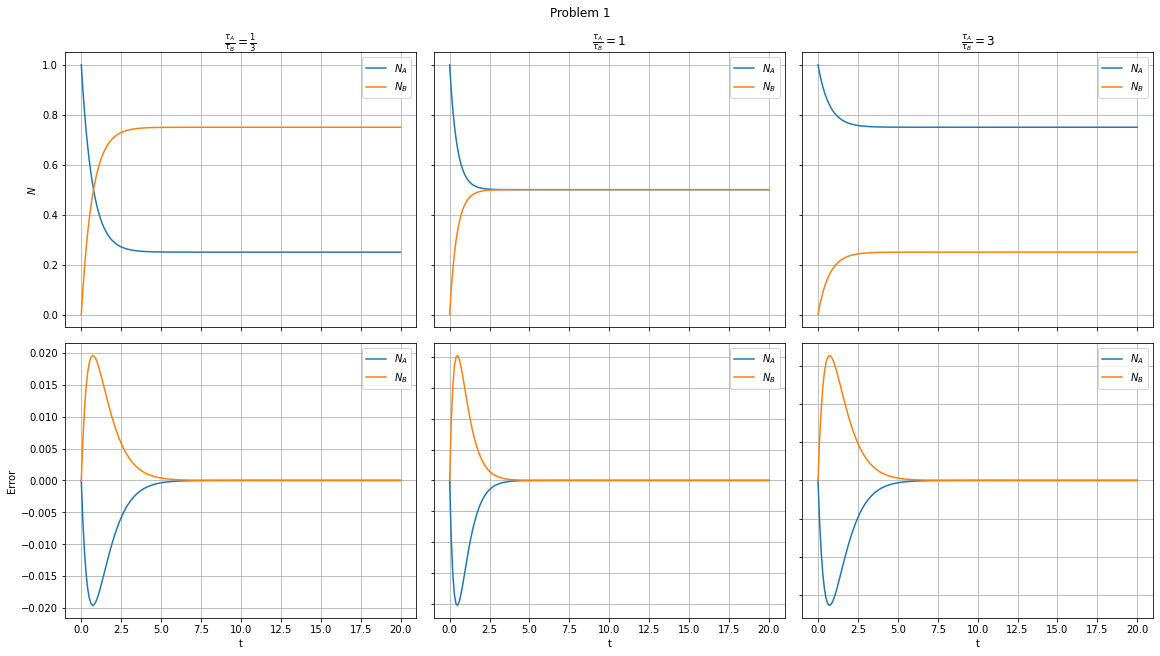

In [31]:
def rhs(t, X, ta, tb):
    return np.array([X[1] / tb - X[0] / ta, X[0] / ta - X[1] / tb])


def Na(t, ta, tb, Na0, Nb0):
    try:
        return Na0 * (tb * np.exp(-(ta + tb) * t / (ta * tb)) + ta) / (ta + tb) - Nb0 * ta * (np.exp(-(ta + tb) * t / (ta * tb)) - 1) / (ta + tb)
    except ZeroDivisionError:  # Correction for division by zero when ta == tb
        ta = ta + np.finfo(np.float32).eps
        return Nb(t, ta, tb, Na0, Nb0)


def Nb(t, ta, tb, Na0, Nb0):
    try:
        return Nb0 * (ta * np.exp(-(ta + tb) * t / (ta * tb)) + tb) / (ta + tb) - Na0 * tb * (np.exp(-(ta + tb) * t / (ta * tb)) - 1) / (ta + tb)
    except ZeroDivisionError:  # Correction for division by zero when ta == tb
        tb = tb + np.finfo(np.float32).eps
        return Na(t, ta, tb, Na0, Nb0)


ta1, ta2, ta3 = 1, 1, 3
tb1, tb2, tb3 = 3, 1, 1
Na0, Nb0 = 1, 0

t = np.linspace(0,20,200)  # dt = 0.1
y1 = dsolve(partial(rhs, ta=ta1, tb=tb1), t, [Na0, Nb0])
y2 = dsolve(partial(rhs, ta=ta2, tb=tb2), t, [Na0, Nb0])
y3 = dsolve(partial(rhs, ta=ta3, tb=tb3), t, [Na0, Nb0])

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(16, 9), constrained_layout=True)

axs[0, 0].plot(t, y1[0], label=r"$N_A$")
axs[0, 0].plot(t, y1[1], label=r"$N_B$")

axs[0, 1].plot(t, y2[0], label=r"$N_A$")
axs[0, 1].plot(t, y2[1], label=r"$N_B$")

axs[0, 2].plot(t, y3[0], label=r"$N_A$")
axs[0, 2].plot(t, y3[1], label=r"$N_B$")

axs[1, 0].plot(t, y1[0]-Na(t, ta1, tb1, Na0, Nb0), label=r"$N_A$")
axs[1, 0].plot(t, y1[1] - Nb(t, ta1, tb1, Na0, Nb0), label=r"$N_B$")
axs[1, 1].plot(t, y2[0]-Na(t, ta2, tb2, Na0, Nb0), label=r"$N_A$")
axs[1, 1].plot(t, y2[1] - Nb(t, ta2, tb2, Na0, Nb0), label=r"$N_B$")
axs[1, 2].plot(t, y3[0]-Na(t, ta3, tb3, Na0, Nb0), label=r"$N_A$")
axs[1, 2].plot(t, y3[1] - Nb(t, ta3, tb3, Na0, Nb0), label=r"$N_B$")

for i in range(2):
    for j in range(3):
        axs[i, j].legend()
        axs[i, j].grid()
        axs[i, j].set_xlabel("t")
        axs[0, j].set_ylabel(r"$N$")
        axs[1, j].set_ylabel(r"Error")

axs[0, 0].set_title(rf"$\frac{{\tau_A}}{{\tau_B}} = {latex(Rational(ta1, tb1))}$")
axs[0, 1].set_title(rf"$\frac{{\tau_A}}{{\tau_B}} = {latex(Rational(ta2, tb2))}$")
axs[0, 2].set_title(rf"$\frac{{\tau_A}}{{\tau_B}} = {latex(Rational(ta3, tb3))}$")
plt.suptitle("Problem 1")
for ax in axs.flat:
    ax.label_outer()

plt.show()

# Problem 2
2.2 (p.24)

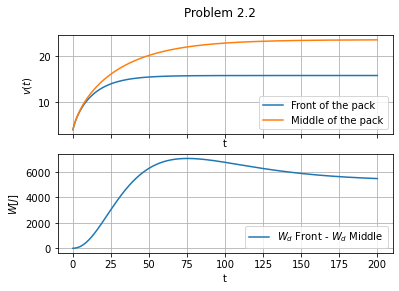

In [32]:
# Global Definitions
g = 9.81  # Gravitational Acceleration [m/s^2]
P = 400  # Power [W]
m = 70  # Mass [kg]
v0 = 4  # Initial velocity [m/s]
C = 0.5  # Drag coefficient
A = 0.33  # Cross-sectional area [m^2]
rho = 1.225  # Air density [kg/m^3]


def rhs(t, X, A):
    return np.array([P/(m*X[0])-0.5*C*rho*A*X[0]**2/m, ])


def rhs2(t, X, A):
    return np.array([X[1], P/(m*X[1])-0.5*C*rho*A*X[1]**2/m])


def W_d(X, A):
    return X[0]*0.5*C*rho*A*X[1]**2


def v(t):
    return np.sqrt(2*P*t/m+v0**2)


t = np.linspace(0,200,20000)
ic = np.array([v0, ])
ic2 = np.array([0, v0])

y1 = dsolve(partial(rhs, A=A), t, ic)
y2 = dsolve(partial(rhs, A=0.3*A), t, ic)
y3 = dsolve(partial(rhs2, A=A), t, ic2)
y4 = dsolve(partial(rhs2, A=0.3*A), t, ic2)

# Plotting
fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].plot(t, y1[0], label="Front of the pack")
ax[0].plot(t, y2[0], label="Middle of the pack")
ax[1].plot(t, W_d(y3, A)-W_d(y4, 0.3*A), label=r"$W_d$ Front - $W_d$ Middle")

ax[0].legend()
ax[0].grid()
ax[0].set_xlabel("t")
ax[0].set_ylabel(r"$v(t)$")

ax[1].legend()
ax[1].grid()
ax[1].set_xlabel("t")
ax[1].set_ylabel(r"$W [J]$")

plt.suptitle("Problem 2.2")
plt.show()
# plt.savefig("../../figures/Chapter2/Problem2_2", dpi=300)


# Problem 3
2.7 (p.31)

In [ ]:
air = Constants.Air()

# Global Definitions
g = 9.81  # Gravitational acceleration [m/s^2]
air_density = 1.225  # Air density [kg/m^3]
m = 47.5  # Mass [kg] of a 10 cm lead sphere
B2_ref = 4.0e-5 * m  # Air resistance coefficient
a = 6.5e-3  # Adiabatic model parameter [K/m]
alpha = 2.5  # Adiabatic model parameter
y_0 = 1.0e4  # k_B*T/mg [m]
T_0 = 300  # Adiabatic model sea level temperature [K]
T_hot = 310.9278  # "Hot summer day" temperature ~ 100 [F]
T_cold = 266.4833  # "Cold winter day" temperature ~ 20 [F]


def rho_isothermal(y):
    return air_density * np.exp(-y / y_0)


def rho_adiabatic(y):
    return air_density * (1 - a * y / T_0) ** alpha


def B2(T):
    return B2_ref * (T_0 / T) ** alpha


def B2_eff(T, rho):
    return (rho / air_density) * B2(T)


def rhs_adiabatic(t, X, T):
    v = np.sqrt(X[2] ** 2 + X[3] ** 2)
    return np.array([X[2], X[3], -B2_eff(T, rho_adiabatic(X[1])) * v * X[2] / m,
                     -g - B2_eff(T, rho_adiabatic(X[1])) * v * X[3] / m])


def rhs_isothermal(t, X, T):
    v = np.sqrt(X[2] ** 2 + X[3] ** 2)
    return np.array([X[2], X[3], -B2_eff(T, rho_isothermal(X[1])) * v * X[2] / m,
                     -g - B2_eff(T, rho_isothermal(X[1])) * v * X[3] / m])


def rhs(t, X):
    return np.array([X[2], X[3], 0, -g])


def terminate(X):
    return X[1] < 0


def f_ic(theta):
    return [x0, y0, v0 * np.cos(np.pi * theta / 180), v0 * np.sin(np.pi * theta / 180)]


x0 = y0 = 0
v0 = 700
angles = (30, 45, 60)
t = np.linspace(0, 200, 20000)

# Part A
# Adiabatic vs Isothermal, Normal Temperature
soln00 = dsolve(partial(rhs_adiabatic, T=T_0), f_ic(angles[0]), t, terminate=terminate)
soln01 = dsolve(partial(rhs_adiabatic, T=T_0), f_ic(angles[1]), t, terminate=terminate)
soln02 = dsolve(partial(rhs_adiabatic, T=T_0), f_ic(angles[2]), t, terminate=terminate)
soln10 = dsolve(partial(rhs_isothermal, T=T_0), f_ic(angles[0]), t, terminate=terminate)
soln11 = dsolve(partial(rhs_isothermal, T=T_0), f_ic(angles[1]), t, terminate=terminate)
soln12 = dsolve(partial(rhs_isothermal, T=T_0), f_ic(angles[2]), t, terminate=terminate)

t00 = t[:np.size(soln00[0])]
t01 = t[:np.size(soln01[0])]
t02 = t[:np.size(soln02[0])]
t10 = t[:np.size(soln10[0])]
t11 = t[:np.size(soln11[0])]
t12 = t[:np.size(soln12[0])]

# Plotting
_, ax = plt.subplots(1, 1)
ax.plot(soln10[0] / 1000, soln10[1] / 1000, 'r-', label=r"Isothermal, $\theta = 30^{\circ}$")
ax.plot(soln11[0] / 1000, soln11[1] / 1000, 'b-', label=r"Isothermal, $\theta = 45^{\circ}$")
ax.plot(soln12[0] / 1000, soln12[1] / 1000, 'k-', label=r"Isothermal, $\theta = 60^{\circ}$")
ax.plot(soln00[0] / 1000, soln00[1] / 1000, 'r--', label=r"$Adiabatic, \theta = 30^{\circ}$")
ax.plot(soln01[0] / 1000, soln01[1] / 1000, 'b--', label=r"$Adiabatic, \theta = 45^{\circ}$")
ax.plot(soln02[0] / 1000, soln02[1] / 1000, 'k--', label=r"$Adiabatic, \theta = 60^{\circ}$")

ax.legend()
ax.grid()
ax.set_xlabel("x [km]")
ax.set_ylabel("y [km]")
ax.set_title("Adiabatic vs. Isothermal Model")
plt.suptitle("Problem 2.7a")
plt.savefig("../../figures/Chapter2/Problem2_7a", dpi=300)


# Part B
# Adiabatic, Hot vs Cold
soln20 = dsolve(partial(rhs_adiabatic, T=T_cold), f_ic(angles[0]), t, terminate=terminate)
soln21 = dsolve(partial(rhs_adiabatic, T=T_cold), f_ic(angles[1]), t, terminate=terminate)
soln22 = dsolve(partial(rhs_adiabatic, T=T_cold), f_ic(angles[2]), t, terminate=terminate)
soln30 = dsolve(partial(rhs_adiabatic, T=T_hot), f_ic(angles[0]), t, terminate=terminate)
soln31 = dsolve(partial(rhs_adiabatic, T=T_hot), f_ic(angles[1]), t, terminate=terminate)
soln32 = dsolve(partial(rhs_adiabatic, T=T_hot), f_ic(angles[2]), t, terminate=terminate)

# Plotting
_, ax = plt.subplots(1, 1)
ax.plot(soln20[0] / 1000, soln20[1] / 1000, 'r-', label=r"Cold, $\theta = 30^{\circ}$")
ax.plot(soln21[0] / 1000, soln21[1] / 1000, 'b-', label=r"Cold, $\theta = 45^{\circ}$")
ax.plot(soln22[0] / 1000, soln22[1] / 1000, 'k-', label=r"Cold, $\theta = 60^{\circ}$")
ax.plot(soln30[0] / 1000, soln30[1] / 1000, 'r--', label=r"$Hot, \theta = 30^{\circ}$")
ax.plot(soln31[0] / 1000, soln31[1] / 1000, 'b--', label=r"$Hot, \theta = 45^{\circ}$")
ax.plot(soln32[0] / 1000, soln32[1] / 1000, 'k--', label=r"$Hot, \theta = 60^{\circ}$")

ax.legend()
ax.grid()
ax.set_xlabel("x [km]")
ax.set_ylabel("y [km]")
ax.set_title("Adiabatic Model, Hot vs. Cold Temperatures")
plt.suptitle("Problem 2.7b")
plt.savefig("../../figures/Chapter2/Problem2_7b", dpi=300)


import tqdm

# Part C
angles = np.linspace(np.pi / 6, np.pi / 3, 30)
temperatures = np.linspace(T_cold, T_hot, int(T_hot - T_cold))
t = np.linspace(0, 400, 40000)
max_ranges = []
for _, temperature in enumerate(tqdm.tqdm(temperatures, desc="Sweeping")):
    max_range = 0
    for angle in angles:
        y0 = [0, 0, v0 * np.cos(angle), v0 * np.sin(angle)]
        soln = euler(partial(rhs_adiabatic, T=temperature), y0, t, terminate=terminate)
        max_range = max([max_range, soln[0, -1]])
    max_ranges.append(max_range / 1000)

# Plotting
fig, ax = plt.subplots(1, 1)
ax.plot(temperatures - 273.15, max_ranges)
ax.grid()
ax.set_xlabel("Temperature [C]")
ax.set_ylabel("Range [km]")
ax.set_title("Maximum Range Vs. Temperature")
plt.suptitle("Problem 2.7c")
plt.savefig("../../figures/Chapter2/Problem2_7c", dpi=300)
#
# # ##############################
# #
# # # Account for the fact that the data can be different sizes due to the termination condition
# # minx0 = min(np.size(adiabatic_x_0), np.size(isothermal_x_0))
# # minx1 = min(np.size(adiabatic_x_1), np.size(isothermal_x_1))
# # minx2 = min(np.size(adiabatic_x_2), np.size(isothermal_x_2))
# # miny0 = min(np.size(adiabatic_y_0), np.size(isothermal_y_0))
# # miny1 = min(np.size(adiabatic_y_1), np.size(isothermal_y_1))
# # miny2 = min(np.size(adiabatic_y_2), np.size(isothermal_y_2))
# # min0 = min(minx0, miny0)
# # min1 = min(minx1, miny1)
# # min2 = min(minx2, miny2)
# #
# # # Part A
# # # Adiabatic vs Isothermal, Normal Temperature
# #
# #
# # # Plotting
# # fig, ax = plt.subplots(1,1)
# # ax.plot(isothermal_x_0/1000, isothermal_y_0/1000,'r-', label=rf"Isothermal, $\theta = 30^{{\circ}}$")
# # ax.plot(isothermal_x_1/1000, isothermal_y_1/1000,'b-', label=rf"Isothermal, $\theta = 45^{{\circ}}$")
# # ax.plot(isothermal_x_2/1000, isothermal_y_2/1000,'k-', label=rf"Isothermal, $\theta = 60^{{\circ}}$")
# # ax.plot(adiabatic_x_0/1000, adiabatic_y_0/1000,'r--', label=rf"$Adiabatic, \theta = 30^{{\circ}}$")
# # ax.plot(adiabatic_x_1/1000, adiabatic_y_1/1000,'b--', label=rf"$Adiabatic, \theta = 45^{{\circ}}$")
# # ax.plot(adiabatic_x_2/1000, adiabatic_y_2/1000,'k--', label=rf"$Adiabatic, \theta = 60^{{\circ}}$")
# #
# # ax.legend()
# # ax.grid()
# # ax.set_xlabel("x [km]")
# # ax.set_ylabel("y [km]")
# # ax.set_title("Adiabatic vs. Isothermal Model")
# # plt.suptitle("Problem 2.7a")
# # plt.savefig("../../figures/Chapter2/Problem2_7a",dpi=300)
# #
# # # Part B
# #
# #
# # # Plotting
# # fig, ax = plt.subplots(1,1)
# # ax.plot(cold_x_0/1000, cold_y_0/1000,'r-', label=rf"Cold, $\theta = 30^{{\circ}}$")
# # ax.plot(cold_x_1/1000, cold_y_1/1000,'b-', label=rf"Cold, $\theta = 45^{{\circ}}$")
# # ax.plot(cold_x_2/1000, cold_y_2/1000,'k-', label=rf"Cold, $\theta = 60^{{\circ}}$")
# # ax.plot(hot_x_0/1000, hot_y_0/1000,'r--', label=rf"Hot, $\theta = 30^{{\circ}}$")
# # ax.plot(hot_x_1/1000, hot_y_1/1000,'b--', label=rf"Hot, $\theta = 45^{{\circ}}$")
# # ax.plot(hot_x_2/1000, hot_y_2/1000,'k--', label=rf"Hot, $\theta = 60^{{\circ}}$")
# #
# # ax.legend()
# # ax.grid()
# # ax.set_xlabel("x [km]")
# # ax.set_ylabel("y [km]")
# # ax.set_title("Adiabatic Model, Hot vs. Cold Temperatures")
# # plt.suptitle("Problem 2.7b")
# # plt.savefig("../../figures/Chapter2/Problem2_7b",dpi=300)
# #
# # import tqdm
# # # Part C
# # angles = np.linspace(np.pi / 6, np.pi / 3, 30)
# # temperatures = np.linspace(T_cold, T_hot, int(T_hot-T_cold))
# # max_ranges = []
# # for _,temperature in enumerate(tqdm.tqdm(temperatures,desc="Sweeping")):
# #     max_range = 0
# #     for angle in angles:
# #         y0 = [0, 0, v0 * np.cos(angle), v0 * np.sin(angle)]
# #         sim = ODE(partial(rhs_adiabatic,T=temperature),y0,ti=0,dt=0.01,tf=400,terminate=terminate)
# #         sim.run()
# #         max_range = max([max_range,sim.X_series[0][-1]])
# #     max_ranges.append(max_range/1000)
# #
# # # Plotting
# # fig, ax = plt.subplots(1, 1)
# # ax.plot(temperatures-273.15, max_ranges)
# # ax.grid()
# # ax.set_xlabel("Temperature [C]")
# # ax.set_ylabel("Range [km]")
# # ax.set_title("Maximum Range Vs. Temperature")
# # plt.suptitle("Problem 2.7c")
# # plt.savefig("../../figures/Chapter2/Problem2_7c", dpi=300)


# Problem 4
In all calculations of cannon shots so far, we neglected the fact that the projectiles are
launched from and measured in the rotating reference frame of Earth. Taking rotation into
account would add a term $−2\vec{\omega}\times\vec{v}$ to the apparent acceleration in Earth’s frame of reference (due to the Coriolis force), making even the spinless cannon problem 3-dimensional. Estimate the effect of the Coriolis force on the trajectory of a typical cannonball launched toward southeast from Lafayette (latitude 40◦ 25’ N) with $v_0 = 700$ m/s at $\theta = 45$ degrees with respect to the horizontal.

# Problem 5
(Order of magnitude checks.) On p.28 of the Giordano-Nakanishi book, the air drag coeffi-
cient for a large cannon shell is said to be $B_2/m \approx 4\times10^{−5} \text{m}^{−1}$. On p.38, the magnitude of the Magnus term in baseball is stated to be $S_0/m \approx 4.1 \times 10^{−4}$. Furthermore, p.45 gives an estimate $S_0\omega/m \approx 0.25 \text{s}^{−1}$ for the golf ball, and the next page (p.46, Problem 2.24) says that for a ping-pong ball $S_0/m \approx 0.040$. Argue about the orders of magnitude of these values, and justify them if you can. If needed, refer to the official specifications for the various balls (see, e.g., the document BallSpecs.pdf posted in the Supplemental Materials section of the course home page). If you think that any of the above numbers in the text are unreasonable, then
state why that is so.